In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
# Univariate Analysis

array([[<AxesSubplot: title={'center': 'sepal_length'}>,
        <AxesSubplot: title={'center': 'sepal_width'}>],
       [<AxesSubplot: title={'center': 'petal_length'}>,
        <AxesSubplot: title={'center': 'petal_width'}>]], dtype=object)

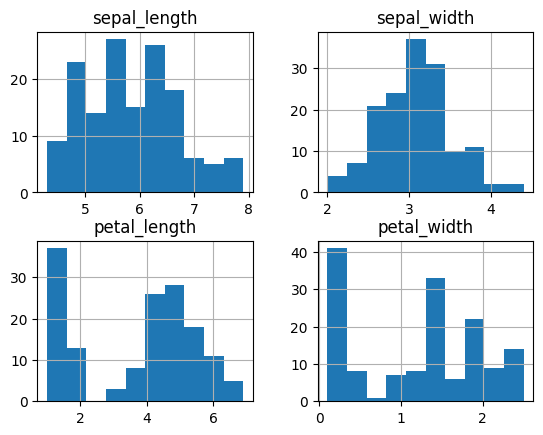

In [12]:
df.hist()

<AxesSubplot: >

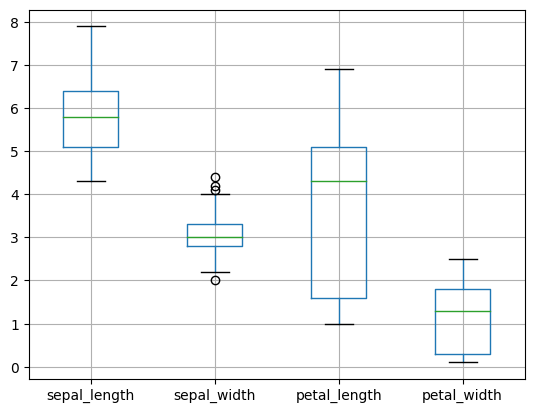

In [13]:
df.boxplot()

<AxesSubplot: xlabel='sepal_length', ylabel='Density'>

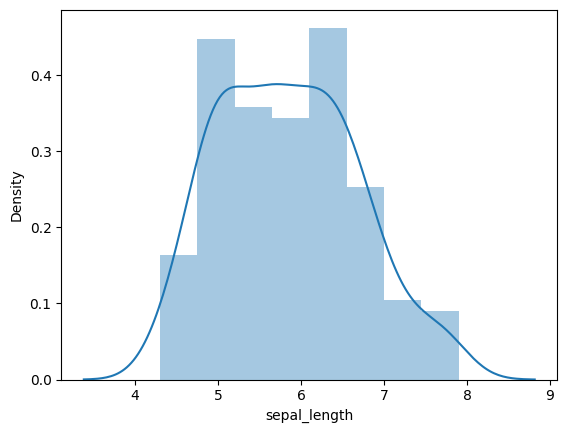

In [14]:
sns.distplot(df['sepal_length'])

<AxesSubplot: xlabel='sepal_width', ylabel='Density'>

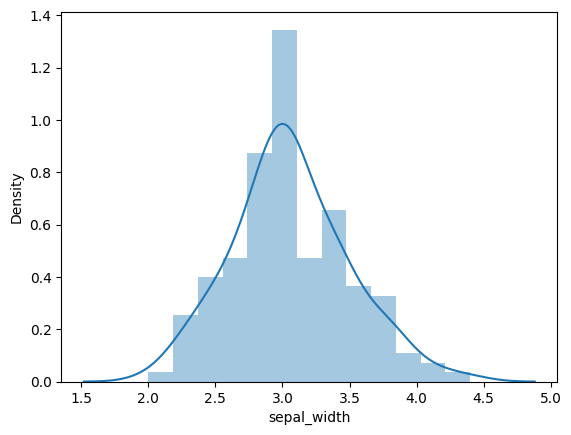

In [15]:
sns.distplot(df['sepal_width'])

<AxesSubplot: xlabel='petal_length', ylabel='Density'>

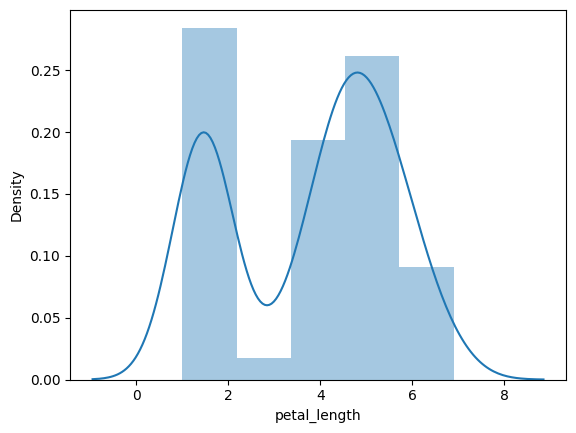

In [16]:
sns.distplot(df['petal_length'])

<AxesSubplot: xlabel='petal_width', ylabel='Density'>

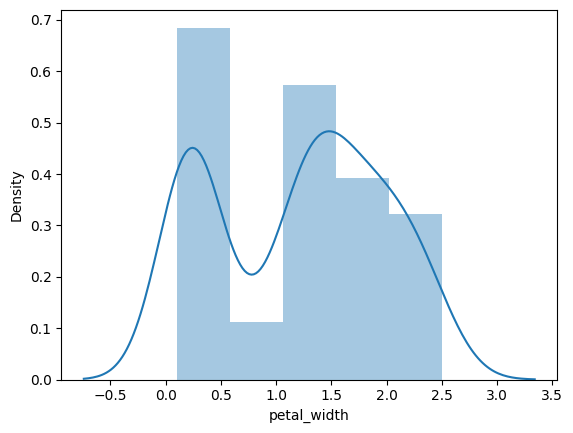

In [17]:
sns.distplot(df['petal_width'])

In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


In [19]:
df = sns.load_dataset('iris')

In [20]:
sepal_length = {}
for i in df.species.unique():
    sepal_length[i] = df[df['species'] == i]['sepal_length']

In [21]:
data = {}
for column in df.columns[:-1]:
    data[column] = {}
    for i in df.species.unique():
        data[column][i] = df[df['species'] == i][column]

In [22]:
data

{'sepal_length': {'setosa': 0     5.1
  1     4.9
  2     4.7
  3     4.6
  4     5.0
  5     5.4
  6     4.6
  7     5.0
  8     4.4
  9     4.9
  10    5.4
  11    4.8
  12    4.8
  13    4.3
  14    5.8
  15    5.7
  16    5.4
  17    5.1
  18    5.7
  19    5.1
  20    5.4
  21    5.1
  22    4.6
  23    5.1
  24    4.8
  25    5.0
  26    5.0
  27    5.2
  28    5.2
  29    4.7
  30    4.8
  31    5.4
  32    5.2
  33    5.5
  34    4.9
  35    5.0
  36    5.5
  37    4.9
  38    4.4
  39    5.1
  40    5.0
  41    4.5
  42    4.4
  43    5.0
  44    5.1
  45    4.8
  46    5.1
  47    4.6
  48    5.3
  49    5.0
  Name: sepal_length, dtype: float64,
  'versicolor': 50    7.0
  51    6.4
  52    6.9
  53    5.5
  54    6.5
  55    5.7
  56    6.3
  57    4.9
  58    6.6
  59    5.2
  60    5.0
  61    5.9
  62    6.0
  63    6.1
  64    5.6
  65    6.7
  66    5.6
  67    5.8
  68    6.2
  69    5.6
  70    5.9
  71    6.1
  72    6.3
  73    6.1
  74    6.4
  75    6.6
  76    6.

In [23]:
from scipy.stats import f_oneway

In [24]:
for i in data.keys():
    _, p_value = f_oneway(data[i]['setosa'], data[i]['versicolor'], data[i]['virginica'])
    print(f"P-value of {i} : {p_value}")
    if p_value > 0.05:
        print(f"There is no relationship between means of {list(data[i].keys())}")
    else:
        print(f"There is relationship between means of {list(data[i].keys())}")
    print("\n")

P-value of sepal_length : 1.669669190769383e-31
There is relationship between means of ['setosa', 'versicolor', 'virginica']


P-value of sepal_width : 4.49201713330911e-17
There is relationship between means of ['setosa', 'versicolor', 'virginica']


P-value of petal_length : 2.856776610961539e-91
There is relationship between means of ['setosa', 'versicolor', 'virginica']


P-value of petal_width : 4.1694458394430593e-85
There is relationship between means of ['setosa', 'versicolor', 'virginica']




In [25]:
df['species'] = df['species'].map({'setosa' : 1, 'versicolor' : 2, 'virginica' : 3})

In [26]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression(multi_class='multinomial')
from sklearn.model_selection import GridSearchCV
parameter={'C':[0.01,0.03, 0.07, 0.09, 0.1], 'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)
log_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.01, 0.03, 0.07, 0.09, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [29]:
print(log_regressor.best_params_)

{'C': 0.09, 'penalty': 'l2'}


In [30]:
print(log_regressor.best_score_)

0.9111111111111111


In [31]:
prediction_log=log_regressor.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [33]:
confusion_matrix(y_test,prediction_log)

array([[23,  0,  0],
       [ 0, 17,  2],
       [ 0,  0, 18]], dtype=int64)

In [34]:
accuracy_score(y_test,prediction_log)

0.9666666666666667

In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Split the dataset into features and labels
X = iris_df.drop('class', axis=1)
y = iris_df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the logistic regression classifier with L2 regularization
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.1, penalty='l2')

# Train the classifier on the training data
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)

# Predict the labels of the test data
y_pred_test = logreg.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ", accuracy)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: ", accuracy)


Accuracy:  0.9333333333333333
Accuracy:  0.9555555555555556
